# **CROP PREDICTION MODEL**

# ***Data Collection***


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df2=pd.read_csv('/content/crop_yield.csv.zip')

df2

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [ ]:
new_df=df2.drop(['Crop_Year','Area','Production','Yield'],axis=1)
new_df

,Crop,Season,State,Annual_Rainfall,Fertilizer,Pesticide
0,Arecanut,Whole Year,Assam,2051.4,7024878.38,22882.34
1,Arhar/Tur,Kharif,Assam,2051.4,631643.29,2057.47
2,Castor seed,Kharif,Assam,2051.4,75755.32,246.76
3,Coconut,Whole Year,Assam,2051.4,1870661.52,6093.36
4,Cotton(lint),Kharif,Assam,2051.4,165500.63,539.09
...,...,...,...,...,...,...
19684,Small millets,Kharif,Nagaland,1498.0,395200.00,1160.00
19685,Wheat,Rabi,Nagaland,1498.0,98800.00,290.00
19686,Maize,Kharif,Jammu and Kashmir,1356.2,29586735.11,96373.73
19687,Rice,Kharif,Jammu and Kashmir,1356.2,26242746.82,85481.26


In [ ]:
new_df['Season'].unique()


array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [ ]:
new_df['Annual_Rainfall'].skew()

np.float64(2.1317850114644354)

In [ ]:
new_df['Fertilizer'].isnull().sum()

np.int64(0)

In [ ]:
new_df['Fertilizer'].skew()

np.float64(13.412598810025766)

In [ ]:
new_df.describe()

,Annual_Rainfall,Fertilizer,Pesticide
count,19689.000000,1.968900e+04,1.968900e+04
mean,1437.755177,2.410331e+07,4.884835e+04
std,816.909589,9.494600e+07,2.132874e+05
min,301.300000,5.417000e+01,9.000000e-02
25%,940.700000,1.880146e+05,3.567000e+02
50%,1247.600000,1.234957e+06,2.421900e+03
75%,1643.700000,1.000385e+07,2.004170e+04
max,6552.700000,4.835407e+09,1.575051e+07


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Season           19689 non-null  object 
 2   State            19689 non-null  object 
 3   Annual_Rainfall  19689 non-null  float64
 4   Fertilizer       19689 non-null  float64
 5   Pesticide        19689 non-null  float64
dtypes: float64(3), object(3)
memory usage: 923.1+ KB


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Season           19689 non-null  object 
 2   State            19689 non-null  object 
 3   Annual_Rainfall  19689 non-null  float64
 4   Fertilizer       19689 non-null  float64
 5   Pesticide        19689 non-null  float64
dtypes: float64(3), object(3)
memory usage: 923.1+ KB


# ***Data Visualization***

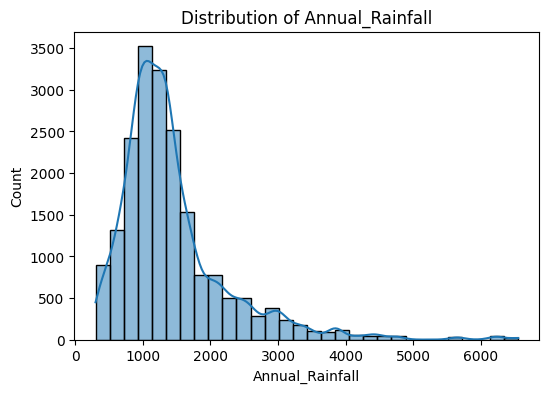

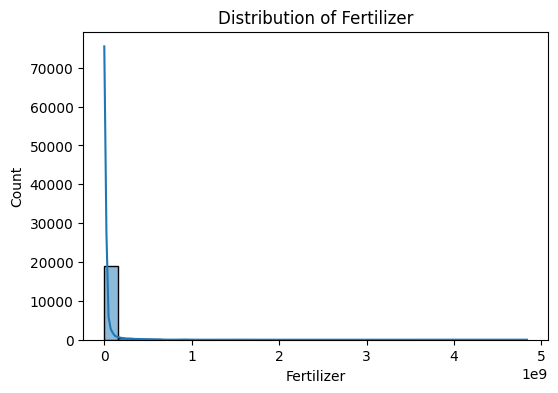

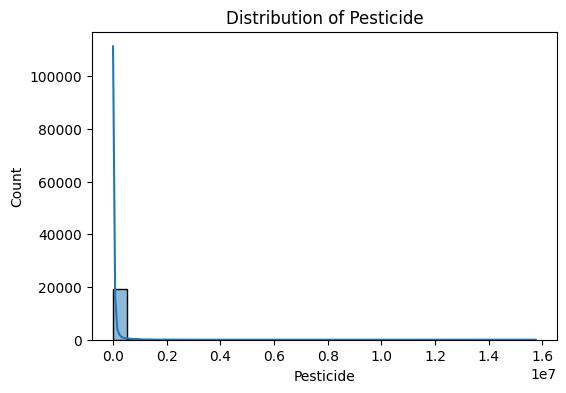

In [ ]:
#univariate analysis to check data is normalized or not.

numerical_features = ['Annual_Rainfall', 'Fertilizer', 'Pesticide']
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(new_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()




*   The **annual rainfall** column is left skewed for which we have to make it normalized.
*   The **fertilizer** and **pesticide** column need to be mean centered so that to bring them in a common scale.







In [ ]:
new_df['Crop'].isnull().sum()


np.int64(0)

In [ ]:
print(new_df.columns)

Index(['Crop', 'Season', 'State', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide'],
      dtype='object')


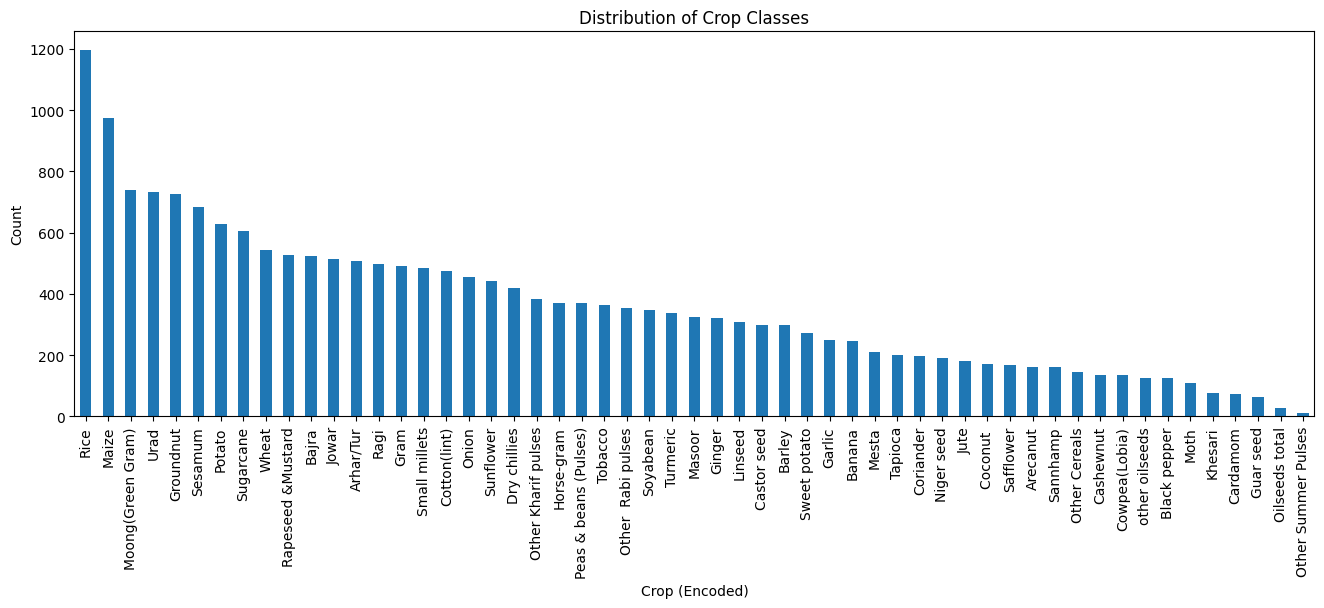

In [ ]:
import matplotlib.pyplot as plt

# Count how many times each crop appears
crop_counts = new_df['Crop'].value_counts()

# Plot the distribution
plt.figure(figsize=(16, 5))
crop_counts.plot(kind='bar')
plt.title('Distribution of Crop Classes')
plt.xlabel('Crop (Encoded)')
plt.ylabel('Count')
plt.show()


In [ ]:
crop_percentages = new_df['Crop'].value_counts(normalize=True) * 100
print(crop_percentages.head(10))  # Top 10 crops by frequency

Crop
Rice                 6.079537
Maize                4.952004
Moong(Green Gram)    3.758444
Urad                 3.722891
Groundnut            3.682259
Sesamum              3.479100
Potato               3.189598
Sugarcane            3.072782
Wheat                2.768043
Rapeseed &Mustard    2.681700
Name: proportion, dtype: float64


In [ ]:
crop_proportion = new_df['Crop'].value_counts(normalize=True) * 100
minority_classes = crop_proportion[crop_proportion < 1]
print(f"Number of minority crop classes (<1%): {len(minority_classes)}")


Number of minority crop classes (<1%): 17


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Annual_Rainfall', 'Fertilizer', 'Pesticide']
scaler = StandardScaler()
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])


In [ ]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib
import pandas as pd

# Encode Crop (target)
label_encoder = LabelEncoder()
new_df['Crop'] = label_encoder.fit_transform(new_df['Crop'])
joblib.dump(label_encoder, 'label_encoder.pkl')

# One-hot encode State and Season
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = ohe.fit_transform(new_df[['State', 'Season']])
encoded_df = pd.DataFrame(encoded_cats, columns=ohe.get_feature_names_out(['State', 'Season']))
joblib.dump(ohe, 'ohe_encoder.pkl')

# Merge and clean
new_df = new_df.drop(['State', 'Season'], axis=1)
new_df = pd.concat([new_df.reset_index(drop=True), encoded_df], axis=1)

In [ ]:
X = new_df.drop('Crop', axis=1)
y = new_df['Crop']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train


,Annual_Rainfall,Fertilizer,Pesticide,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,...,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
6958,-1.313955,-0.211057,-0.180547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18831,1.757699,-0.249409,-0.224239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8898,-0.354951,0.055337,0.037771,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6276,1.476878,-0.253638,-0.228696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8147,-0.779733,-0.253697,-0.228829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,0.655958,-0.185008,-0.148081,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18898,1.344301,-0.248178,-0.222586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11798,-0.419341,0.149386,0.030331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6637,-0.850000,-0.158179,-0.103999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_test

,Annual_Rainfall,Fertilizer,Pesticide,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,...,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
4426,-0.608473,-0.253268,-0.228472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2043,-0.725380,0.305305,0.199770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12566,-0.086860,-0.251929,-0.227256,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13386,-1.041947,-0.251891,-0.227386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13784,-0.511520,-0.253848,-0.229010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19467,2.329130,-0.248864,-0.224642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5484,0.313561,-0.253781,-0.228947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7101,-0.662704,-0.204045,-0.170290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16407,-0.079638,-0.248027,-0.223420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_train

,Crop
6958,27
18831,52
8898,24
6276,36
8147,50
...,...
1099,53
18898,24
11798,24
6637,43


In [ ]:
y_test

,Crop
4426,15
2043,52
12566,26
13386,17
13784,28
...,...
19467,17
5484,0
7101,39
16407,53


In [ ]:
!pip install imbalanced-learn xgboost


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Before SMOTE:", y.value_counts().shape[0], "classes")
print("After SMOTE:", pd.Series(y_res).value_counts().shape[0], "classes (balanced)")


Before SMOTE: 55 classes
After SMOTE: 55 classes (balanced)


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Crop                     19689 non-null  int64  
 1   Annual_Rainfall          19689 non-null  float64
 2   Fertilizer               19689 non-null  float64
 3   Pesticide                19689 non-null  float64
 4   State_Arunachal Pradesh  19689 non-null  float64
 5   State_Assam              19689 non-null  float64
 6   State_Bihar              19689 non-null  float64
 7   State_Chhattisgarh       19689 non-null  float64
 8   State_Delhi              19689 non-null  float64
 9   State_Goa                19689 non-null  float64
 10  State_Gujarat            19689 non-null  float64
 11  State_Haryana            19689 non-null  float64
 12  State_Himachal Pradesh   19689 non-null  float64
 13  State_Jammu and Kashmir  19689 non-null  float64
 14  State_Jharkhand       

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize model
lgbm = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=55,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

# Train
lgbm.fit(X_train, y_train)

# Predict
y_pred = lgbm.predict(X_test)

# Evaluate
print("✅ LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2969
[LightGBM] [Info] Number of data points in the train set: 52668, number of used features: 37
[LightGBM] [Info] Start training from score -3.996531
[LightGBM] [Info] Start training from score -4.000672
[LightGBM] [Info] Start training from score -4.000672
[LightGBM] [Info] Start training from score -3.996531
[LightGBM] [Info] Start training from score -4.002749
[LightGBM] [Info] Start training from score -4.009005
[LightGBM] [Info] Start training from score -4.019521
[LightGBM] [Info] Start training from score -4.000672
[LightGBM] [Info] Start training from score -4.014249
[LightGBM] [Info] Start training from score -4.000672
[LightGBM] [Info] Start tra

In [ ]:
y_pred

array([10, 21, 53, ..., 36, 13, 48])

In [ ]:
import joblib
joblib.dump(lgbm, 'lightgbm_crop_model.pkl')

['lightgbm_crop_model.pkl']

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

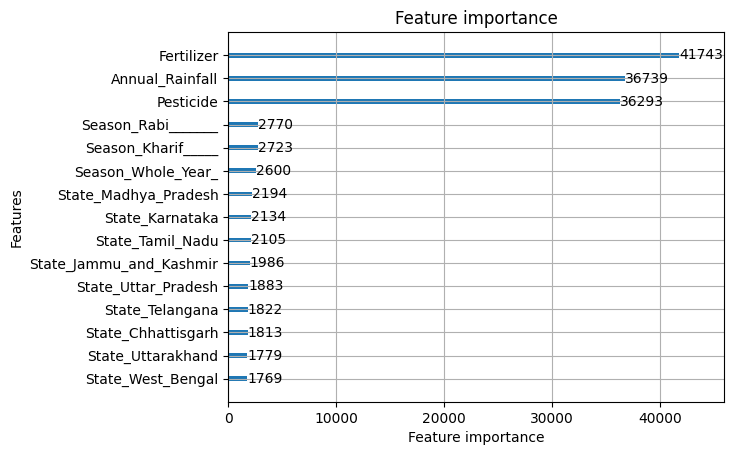

In [ ]:
lgb.plot_importance(lgbm, max_num_features=15)

In [ ]:
new_df['Crop'].unique()

array([ 0,  1,  8,  9, 11, 13, 16, 21, 23, 24, 26, 29, 31, 32, 37, 39, 40,
       43, 44, 46, 48, 49, 50, 51, 53,  2,  5,  6, 10, 14, 15, 17, 19, 20,
       38,  7,  3, 45,  4, 22, 25, 27, 34, 41, 42, 47, 52, 36, 54, 33, 12,
       30, 18, 35, 28])